### Introduction

<b>Churn prediction</b> is one of the most popular Big Data use cases in business. It consists of detecting customers who are likely to cancel a subscription to a service. 

This project is a binary classification problem. If we focus on company goals, actually our problem is losing customers. In this situation the company needs to find churned customer in other words the customers that we will lose. Thus, the company will avoid losing profit and revenue.

### Loading data
We have a dataset with 51047 rows, 58 columns in `cell2celltrain.csv`

In [94]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train=pd.read_csv('cell2celltrain.csv')

In [3]:
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
train.shape

(51047, 58)

### Data Analysis and Preprocessing

Since `CustomerID, ServiceArea` don't really affect the churn result, we can remove these columns from the dataset.

In [5]:
train.drop(['CustomerID', 'ServiceArea'], axis=1, inplace=True)

In [6]:
for i in train.columns:
      if train[i].dtype=='object':
            print(pd.DataFrame(train[i].value_counts()))

     Churn
No   36336
Yes  14711
     ChildrenInHH
No          38679
Yes         12368
     HandsetRefurbished
No                43956
Yes                7091
     HandsetWebCapable
Yes              46046
No                5001
     TruckOwner
No        41524
Yes        9523
     RVOwner
No     46894
Yes     4153
         Homeownership
Known            33987
Unknown          17060
     BuysViaMailOrder
No              32596
Yes             18451
     RespondsToMailOffers
No                  31821
Yes                 19226
     OptOutMailings
No            50295
Yes             752
     NonUSTravel
No         48168
Yes         2879
     OwnsComputer
No          41583
Yes          9464
     HasCreditCard
Yes          34503
No           16544
     NewCellphoneUser
No              41223
Yes              9824
     NotNewCellphoneUser
No                 44012
Yes                 7035
     OwnsMotorcycle
No            50368
Yes             679
         HandsetPrice
Unknown         28982
30   

In [7]:
for i in train.columns:
      if train[i].dtype=='float':
            print(pd.DataFrame(train[i].value_counts()))

        MonthlyRevenue
29.99             1069
34.99              806
10.00              469
30.00              404
49.99              392
...                ...
118.03               1
230.65               1
194.90               1
119.77               1
109.96               1

[12665 rows x 1 columns]
        MonthlyMinutes
0.0                723
2.0                138
8.0                127
6.0                122
88.0               116
...                ...
2252.0               1
2391.0               1
3129.0               1
4578.0               1
2437.0               1

[2719 rows x 1 columns]
       TotalRecurringCharge
30.0                   7302
45.0                   6630
60.0                   4435
40.0                   4415
50.0                   4143
...                     ...
149.0                     1
302.0                     1
281.0                     1
207.0                     1
212.0                     1

[214 rows x 1 columns]
       DirectorAssistedCalls
0.00    

`AgeHH` stands for "Age of Head of Household" so it can not have a value of 0. If "0" appears in `AgeHH1, AgeHH2`, it could potentially indicate a null or missing value.

In [8]:
change_unknown2null = ["HandsetPrice", "MaritalStatus"]

train[change_unknown2null] = train[change_unknown2null].replace("Unknown", np.nan)

change_zero2unknown = ["AgeHH1", "AgeHH2"]
train[change_zero2unknown] = train[change_zero2unknown].replace(0.0, np.nan)

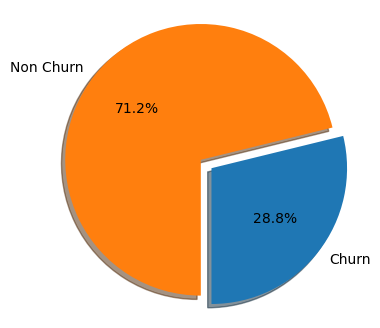

In [9]:
churn=train[train['Churn']== 'Yes'].shape[0]
non_churn = train[train['Churn'] == "No"].shape[0]

fig1, ax1 = plt.subplots(figsize = (4,4))
labels = ["Churn", "Non Churn"]

# explode create distance between 2 part of pie
ax1.pie([churn,non_churn], explode=[0.1, 0], labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()

Customer churn is 28.8%. The data is unbalanced.

==> So when splitting data, we need to balance data


In [10]:
retention_offer=train[train['RetentionOffersAccepted']>0]

The number of customers who accepted the retention call offer : 881
Number of customers lost after accepting the retention call: 362
Number of customers not lost after accepting the retention call : 519
Success rate of the retention call proposal: 0.5891032917139614


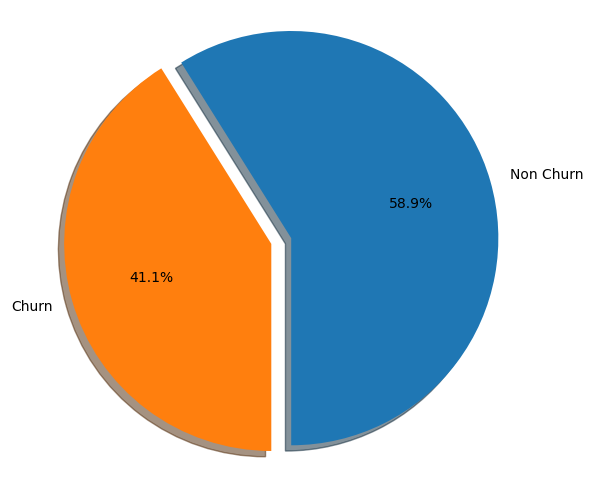

In [11]:
print("The number of customers who accepted the retention call offer : {}".format(retention_offer.shape[0]))
print("Number of customers lost after accepting the retention call: {}".format(retention_offer[retention_offer['Churn']=='Yes'].shape[0]))
print("Number of customers not lost after accepting the retention call : {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]))
print("Success rate of the retention call proposal: {}".format(retention_offer[retention_offer['Churn']=='No'].shape[0]/retention_offer.shape[0]))

slices=[retention_offer[retention_offer['Churn']=='No'].shape[0],retention_offer[retention_offer['Churn']=='Yes'].shape[0]]
labels=['Non Churn','Churn']
explode=[0,0.1]

fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
plt.show()

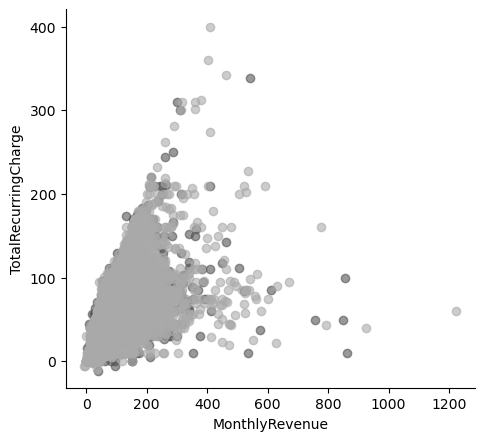

In [12]:
g = sns.PairGrid(train, y_vars=["TotalRecurringCharge"], x_vars=["MonthlyRevenue"], height=4.5, hue="Churn", aspect=1.1, palette="gray")
ax = g.map(plt.scatter, alpha=0.6)

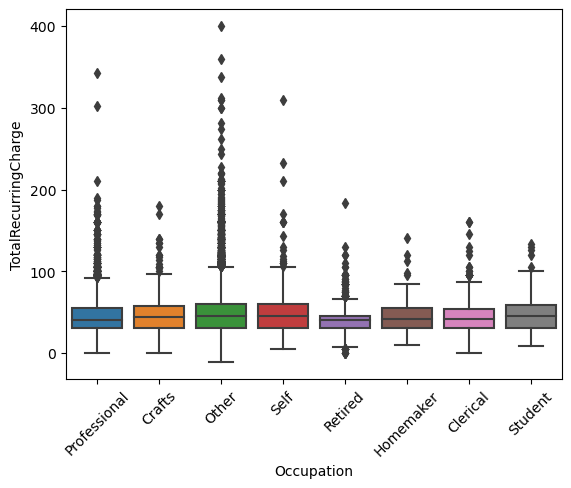

In [13]:
sns.boxplot(data = train, x = 'Occupation', y = 'TotalRecurringCharge')
plt.xticks(rotation=45)
plt.show()

Percentage of customer churn in each credit rating: 
2-High       30.074238
1-Highest    30.837831
3-Good       31.010702
5-Low        22.095707
4-Medium     26.115363
7-Lowest     28.949858
6-VeryLow    27.430556
Name: CreditRating, dtype: float64


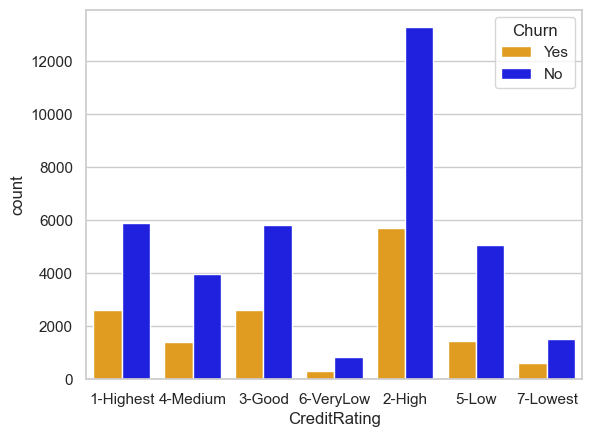

In [14]:
sns.set(style="whitegrid")
sns.countplot(data = train, x = "CreditRating", hue = "Churn", palette = {'No' : 'Blue', 'Yes' : 'Orange'})

print("Percentage of customer churn in each credit rating: ")
print(train[train['Churn'] == 'Yes']['CreditRating'].value_counts()
      / train['CreditRating'].value_counts() * 100)

Percentage of customer churn in each income group: 
0    30.229840
6    28.354325
7    29.794113
9    28.204206
5    28.273111
4    27.658525
3    26.312270
8    27.650648
1    29.131927
2    29.632721
Name: IncomeGroup, dtype: float64


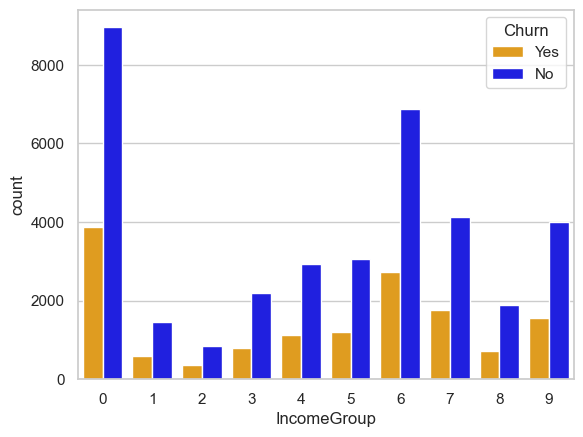

In [15]:
sns.countplot(data = train, x="IncomeGroup", hue="Churn", palette = {'No' : 'Blue', 'Yes' : 'Orange'})

print("Percentage of customer churn in each income group: ")
print(train[train['Churn'] == 'Yes']['IncomeGroup'].value_counts()
      / train['IncomeGroup'].value_counts() * 100)

Group zero has both the highest number of subscribers, but also the highest customer churn rate

<Axes: xlabel='Churn', ylabel='MonthlyMinutes'>

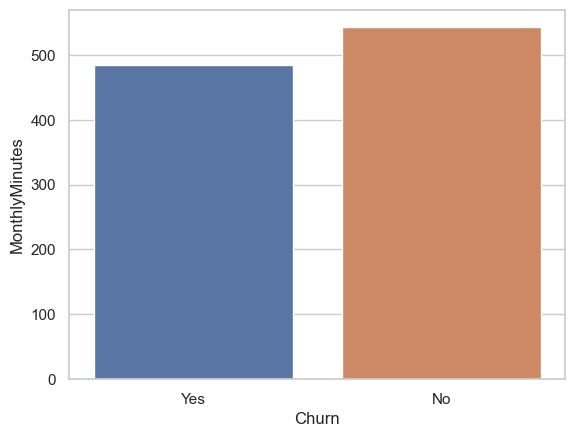

In [16]:
sns.barplot(data = train, x = 'Churn', y = 'MonthlyMinutes', estimator = np.mean)

Percentage of customer churn in each region: 
Other       28.622997
Suburban    28.141409
Town        29.990776
Rural       31.711340
Name: PrizmCode, dtype: float64


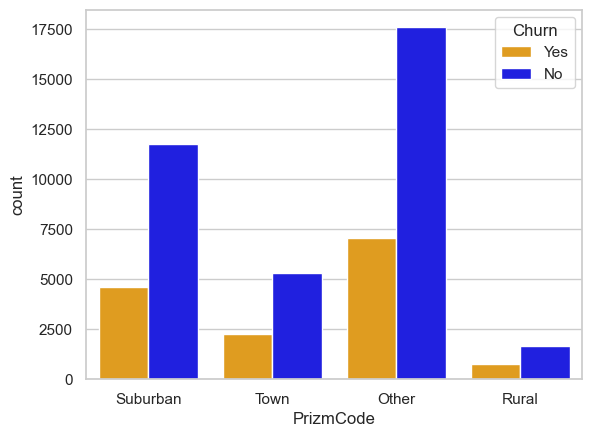

In [17]:
sns.countplot(data = train, x="PrizmCode", hue="Churn", palette = {'No' : 'Blue', 'Yes' : 'Orange'})

print("Percentage of customer churn in each region: ")
print(train[train['Churn'] == 'Yes']['PrizmCode'].value_counts()
      / train['PrizmCode'].value_counts() * 100)

We can see from the graph, the number of people using the service in rural areas is the least, and according to calculations that is also where the customer churn rate is highest.

### Categories of dataset

In [18]:
pd.DataFrame(train.value_counts())

0
Churn MonthlyRevenue MonthlyMinutes TotalRecurringCharge DirectorAssistedCalls OverageMinutes RoamingCalls PercChangeMinutes PercChangeRevenues DroppedCalls BlockedCalls UnansweredCalls CustomerCareCalls ThreewayCalls ReceivedCalls OutboundCalls InboundCalls PeakCallsInOut OffPeakCallsInOut DroppedBlockedCalls CallForwardingCalls CallWaitingCalls MonthsInService UniqueSubs ActiveSubs Handsets HandsetModels CurrentEquipmentDays AgeHH1 AgeHH2 ChildrenInHH HandsetRefurbished HandsetWebCapable TruckOwner RVOwner Homeownership BuysViaMailOrder RespondsToMailOffers OptOutMailings NonUSTravel OwnsComputer HasCreditCard RetentionCalls RetentionOffersAccepted NewCellphoneUser NotNewCellphoneUser ReferralsMadeBySubscriber IncomeGroup OwnsMotorcycle AdjustmentsToCreditRating HandsetPrice MadeCallToRetentionTeam CreditRating PrizmCode Occupation   MaritalStatus   
No    1.05           3.0            0.0                  0.00                  3.0            0.0           0.0               0.0               0.0          0.0          1.0             0.0               0.0           0.0           0.0           0.0          0.3            0.0               0.0                 0.0                 0.0              53              1          1          2.0      1.0           1579.0               70.0   68.0   No           No                 No                No         No      Known         No               No                   No             No          No           Yes           0              0                       No               No                  0                         8           No             1                         30           No                      1-Highest    Suburban  Professional Yes            1
      119.56         1651.0         85.0                 2.97                  166.0          0.0           511.0             11.1              26.3         3.0          95.3            2.0               0.0           337.6         38.0          3.3          402.7          135.0             29.3                0.0                 10.3             12              1          1          2.0      2.0           134.0                40.0   38.0   No           No                 Yes               No         No      Known         No               No                   No             No          No           Yes           0              0                       No               Yes                 0                         6           No             0                         200          No                      5-Low        Other     Other        No             1
      119.34         1014.0         102.0                1.98                  9.0            0.0          -51.0              21.7              9.3          2.0          33.7            3.3               0.7           191.0         27.3          11.3         113.7          66.3              11.3                0.0                 0.3              24              1          1          2.0      2.0           463.0                34.0   68.0   Yes          No                 Yes               No         No      Known         Yes              Yes                  No             No          Yes          Yes           0              0                       No               Yes                 0                         4           No             0                         30           No                      2-High       Suburban  Professional No             1
      119.25         1737.0         55.0                 7.42                  184.0          1.1           790.0             94.6              10.0         32.3         204.0           0.7               2.0           335.6         136.0         71.7         582.3          460.0             42.3                0.0                 6.3              22              2          1          2.0      2.0           375.0                30.0   32.0   Yes          No                 Yes               No         No      Known         No        

In [19]:
for i in train.columns:
      if train[i].dtype=='int64':
            print(pd.DataFrame(train[i].value_counts()))

    MonthsInService
11             3599
7              2821
12             2737
13             2719
9              2477
10             2381
14             2291
8              2214
19             2004
15             1871
23             1836
21             1809
16             1778
17             1749
25             1611
18             1509
20             1413
22             1269
24             1174
26             1022
27              935
29              899
31              863
6               746
28              741
33              717
30              700
35              685
32              589
34              543
37              466
36              425
38              286
39              240
41              210
40              175
43              174
42              151
45              144
44              140
47              124
48              117
49              111
46              110
53               90
50               84
51               64
52               57
54               50


### Data splitting
We recognize that some columns have dtype = `object` are categorical data.


In [20]:
train.loc[train['RetentionOffersAccepted'] > 0, 'RetentionOffersAccepted'] = 1

In [21]:
features = ['IncomeGroup','RetentionOffersAccepted']

def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

    for i in df.columns:
        if df[i].dtype=='object':
            df[i] = df[i].astype('category')
    
convert_cat(train, features)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Churn                      51047 non-null  category
 1   MonthlyRevenue             50891 non-null  float64 
 2   MonthlyMinutes             50891 non-null  float64 
 3   TotalRecurringCharge       50891 non-null  float64 
 4   DirectorAssistedCalls      50891 non-null  float64 
 5   OverageMinutes             50891 non-null  float64 
 6   RoamingCalls               50891 non-null  float64 
 7   PercChangeMinutes          50680 non-null  float64 
 8   PercChangeRevenues         50680 non-null  float64 
 9   DroppedCalls               51047 non-null  float64 
 10  BlockedCalls               51047 non-null  float64 
 11  UnansweredCalls            51047 non-null  float64 
 12  CustomerCareCalls          51047 non-null  float64 
 13  ThreewayCalls              5104

In [23]:
print("Categorical Var. : {}".format(train.select_dtypes(exclude=['int', 'float']).columns))

print("Numeric Var. : {}".format(train.select_dtypes(include=['int', 'float']).columns))

Categorical Var. : Index(['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
       'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'HasCreditCard', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'IncomeGroup', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')
Numeric Var. : Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInServ

### Missing Values


In [24]:
train.columns[train.isnull().any()]

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'HandsetPrice',
       'MaritalStatus'],
      dtype='object')

In [25]:
def kdeplot(feature):
    plt.figure(figsize=(5, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(train[train['Churn'] == 'No'][feature].dropna(), color= 'red', label= 'Churn: No')
    ax1 = sns.kdeplot(train[train['Churn'] == 'Yes'][feature].dropna(), color= 'black', label= 'Churn: Yes')

In [26]:
def kdeplot(features):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    for i, feature in enumerate(features):
        sns.kdeplot(ax=axes[i], data=train[train['Churn'] == 'No'][feature].dropna(), color='red', label='Churn: No')
        sns.kdeplot(ax=axes[i], data=train[train['Churn'] == 'Yes'][feature].dropna(), color='black', label='Churn: Yes')
        axes[i].set_title("KDE for {}".format(feature))
        axes[i].set_xlabel(feature)
    
    plt.tight_layout()

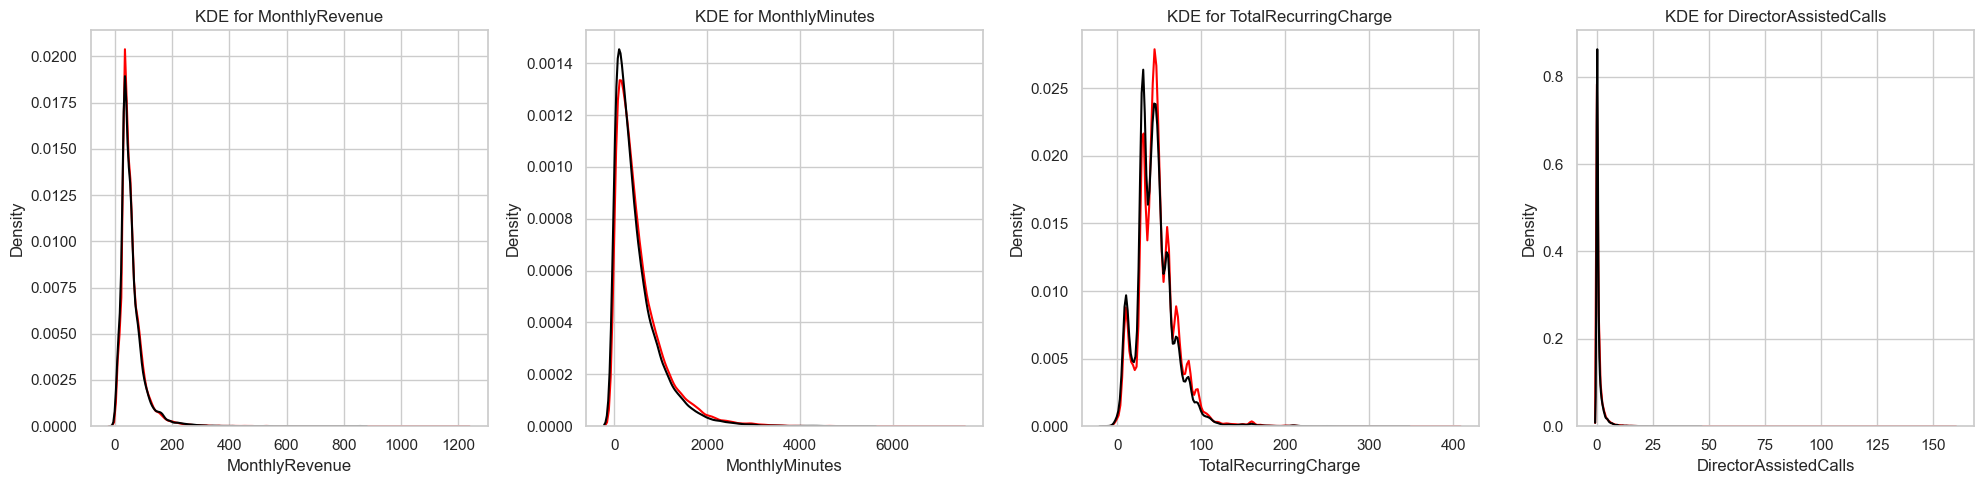

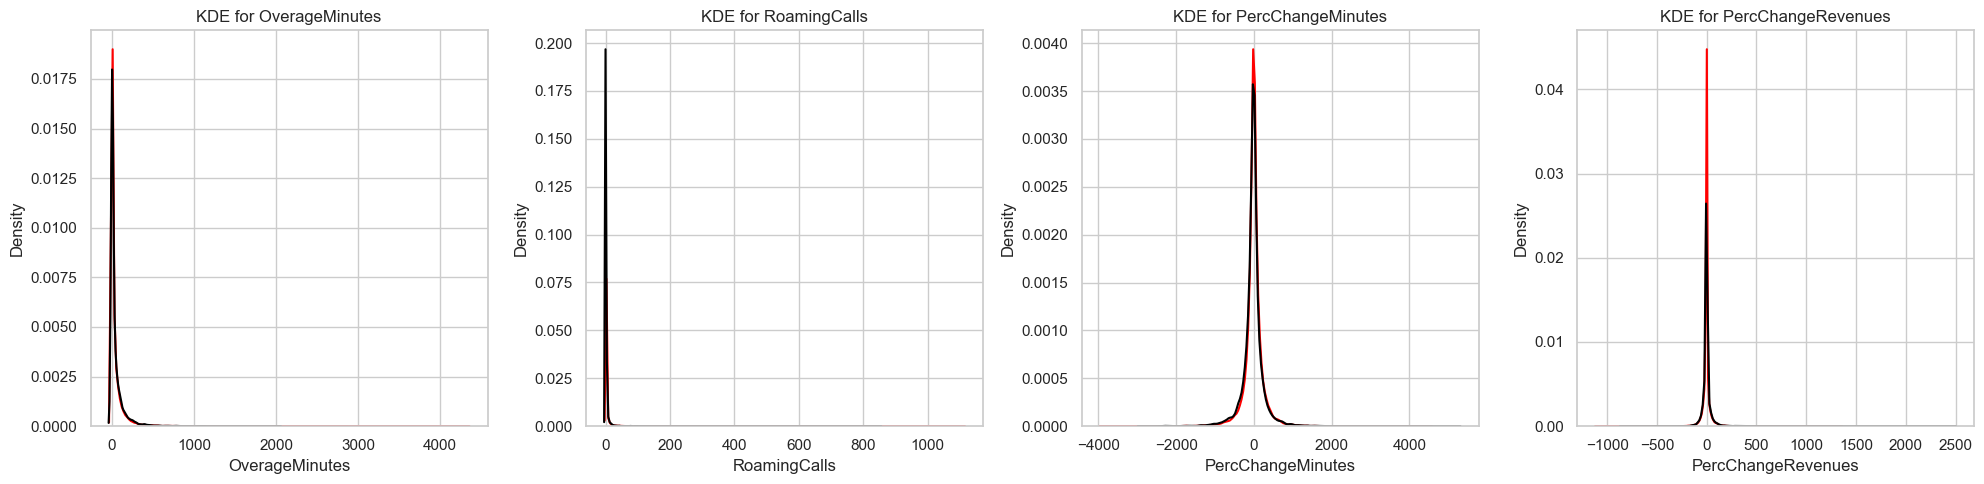

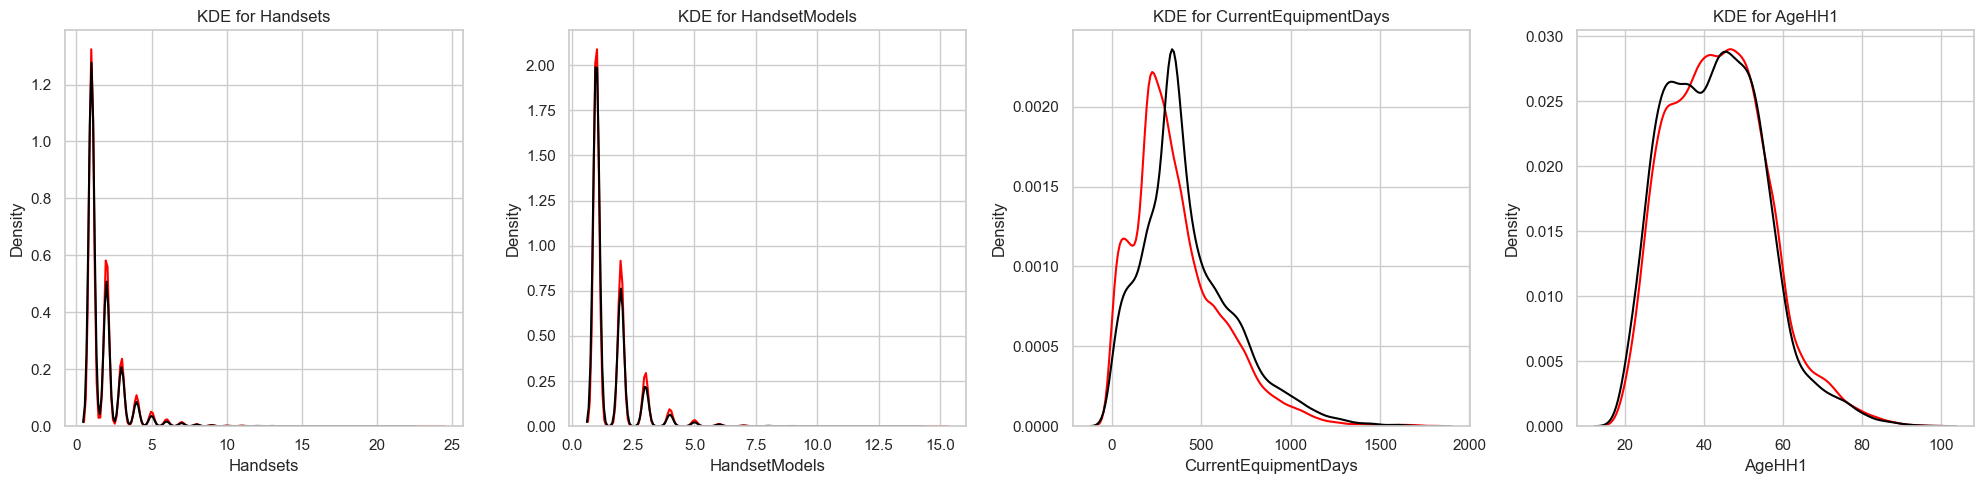

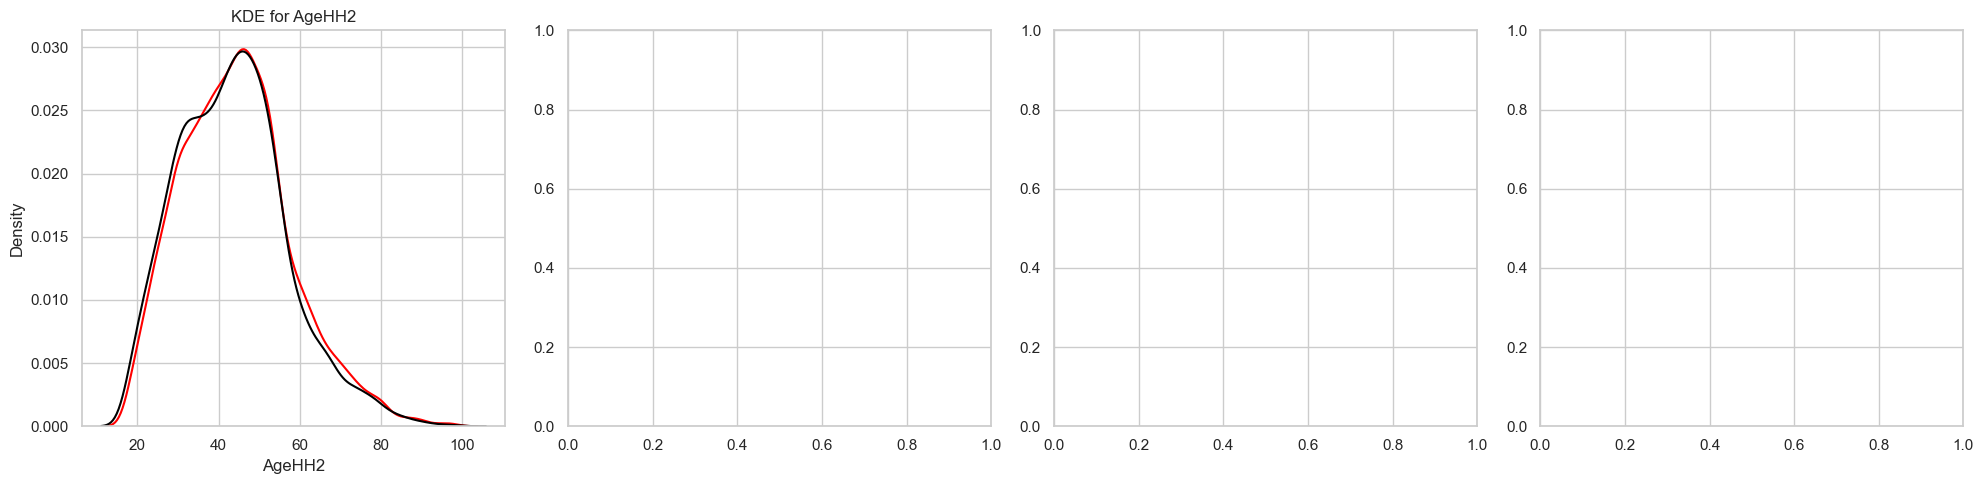

In [27]:
ls = ['MonthlyRevenue', 
      'MonthlyMinutes', 
      'TotalRecurringCharge',
      'DirectorAssistedCalls', 
      'OverageMinutes', 
      'RoamingCalls',
      'PercChangeMinutes', 
      'PercChangeRevenues', 
      'Handsets',
      'HandsetModels', 
      'CurrentEquipmentDays', 
      'AgeHH1',
      'AgeHH2']

for i in range(0, len(ls), 4):
    kdeplot(ls[i:i+4])

In [28]:
train_missings=train.filter(['MonthlyRevenue', 
                             'MonthlyMinutes', 
                             'TotalRecurringCharge',
                             'DirectorAssistedCalls', 
                             'OverageMinutes', 
                             'RoamingCalls',
                             'PercChangeMinutes', 
                             'PercChangeRevenues', 
                             'Handsets',
                             'HandsetModels', 
                             'CurrentEquipmentDays', 
                             'AgeHH1', 
                             'AgeHH2',  
                             'HandsetPrice', 
                             'MaritalStatus'], axis=1)

<Axes: >

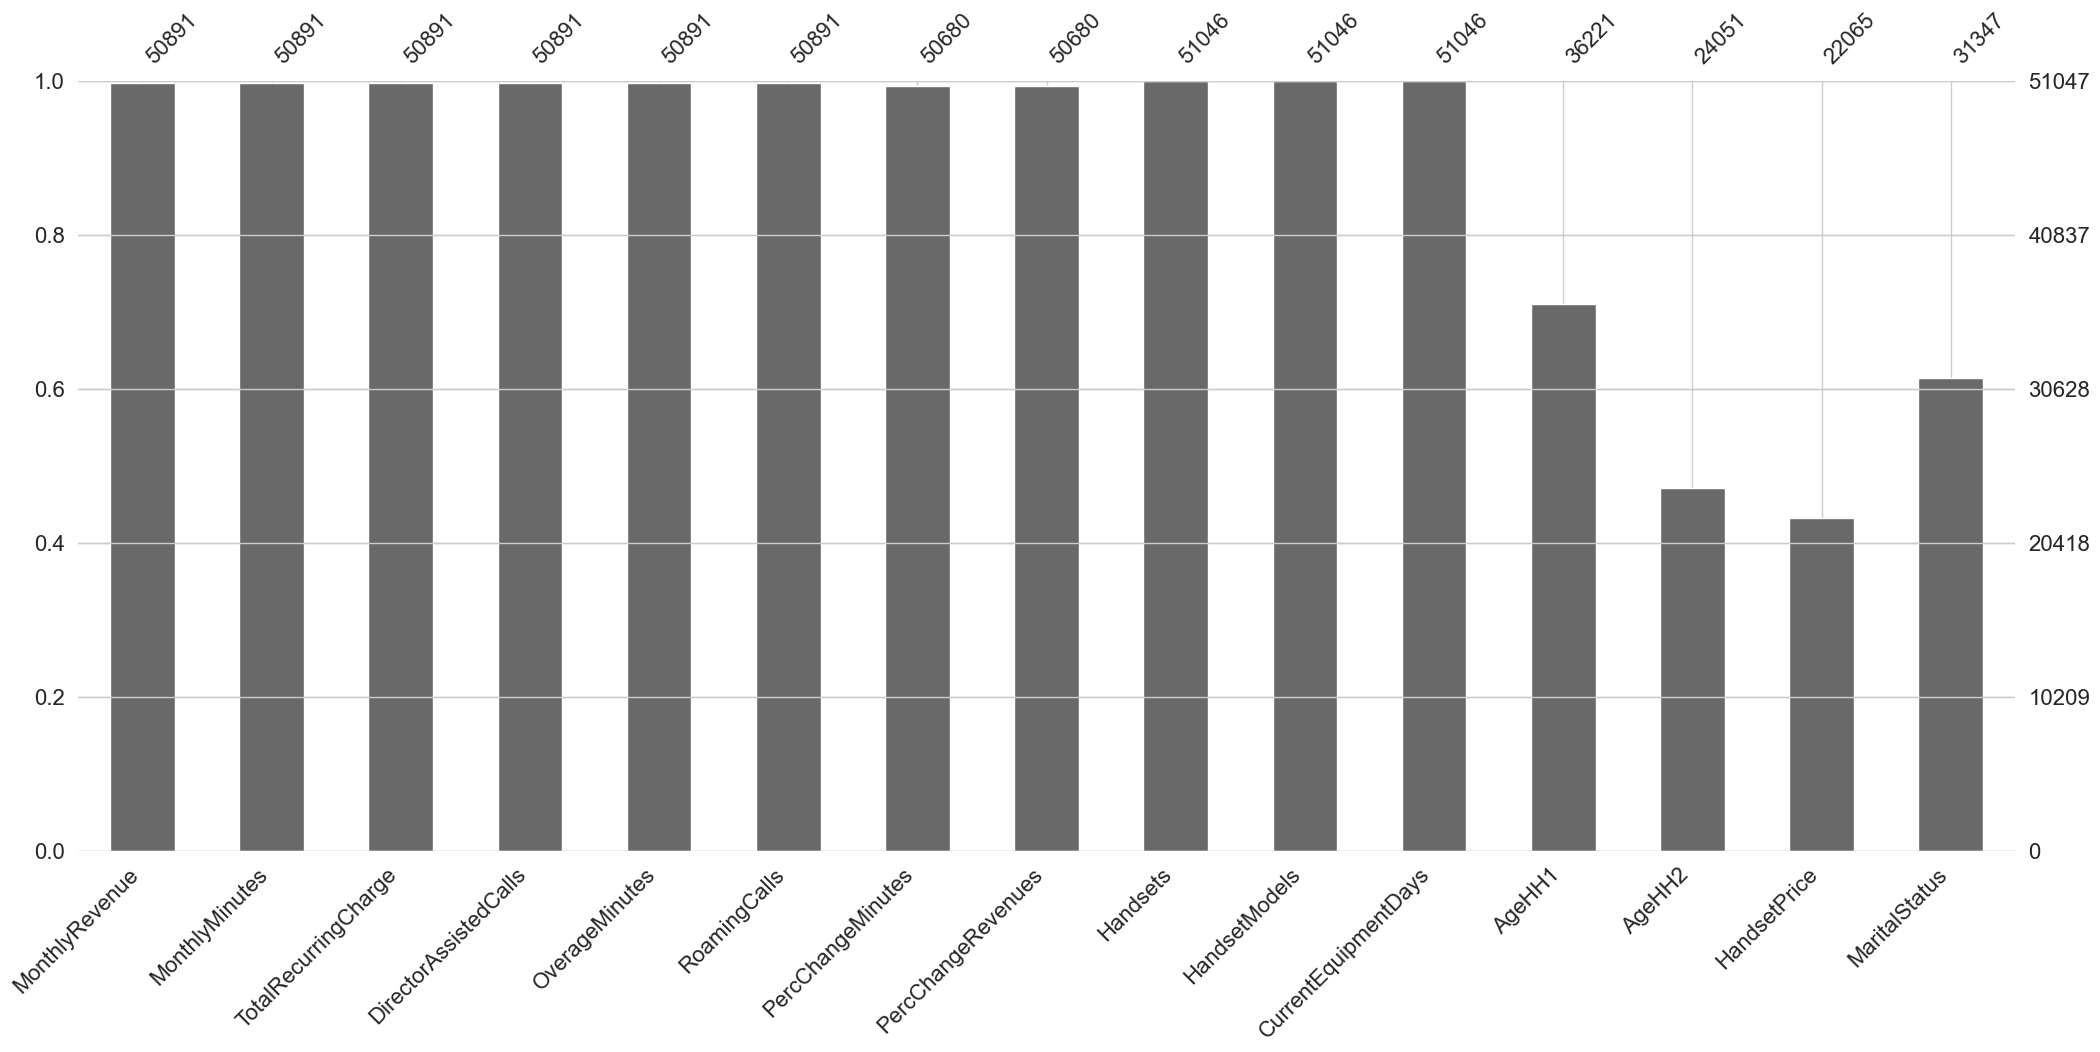

In [29]:
msno.bar(train_missings)

In [30]:
mis_val_train = train_missings.isnull().sum()/len(train_missings) *100

print("Missing-value rate of train data:")
print(mis_val_train)

Missing-value rate of train data:
MonthlyRevenue            0.305601
MonthlyMinutes            0.305601
TotalRecurringCharge      0.305601
DirectorAssistedCalls     0.305601
OverageMinutes            0.305601
RoamingCalls              0.305601
PercChangeMinutes         0.718945
PercChangeRevenues        0.718945
Handsets                  0.001959
HandsetModels             0.001959
CurrentEquipmentDays      0.001959
AgeHH1                   29.043822
AgeHH2                   52.884597
HandsetPrice             56.775129
MaritalStatus            38.591886
dtype: float64


* <i>`"HandsetPrice", "MaritalStatus", "AgeHH2"` have high rate of missing value</i>

In [31]:
train.drop(["HandsetPrice", "MaritalStatus", "AgeHH2"], axis=1, inplace=True)

* Some attributes that are not strongly related to the topic
`TruckOwner,RVOwner, OwnsMotorcycle, NonUSTravel, BuysViaMailOrder, OptOutMailings, MadeCallToRetentionTeam`

In [32]:
train.drop(["TruckOwner", "RVOwner", "OwnsMotorcycle", "NonUSTravel",
            "BuysViaMailOrder", "OptOutMailings", "MadeCallToRetentionTeam"], axis=1, inplace=True)

In [33]:
churn = train[train["Churn"] == "Yes"]
non_churn = train[train["Churn"] == "No"]

In [34]:
churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,RetentionCalls,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
count,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14641.000000,14503.000000,14503.000000,14711.000000,14711.000000,...,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,14711.000000,10256.000000,14711.000000,14711.000000,14711.000000
mean,57.995041,483.827471,44.529882,0.826793,42.529472,1.404358,-25.458388,-0.497111,5.792638,3.990538,...,19.044321,1.598532,1.370811,1.736932,1.501733,421.903881,42.734594,0.058392,0.046904,0.043641
std,44.505934,504.634392,22.990134,1.954381,93.172832,11.106095,269.493300,46.652335,8.834394,10.691814,...,9.336919,1.852533,0.761329,1.262219,0.863085,259.940076,12.334385,0.258222,0.240896,0.297278
min,0.000000,0.000000,-11.000000,0.000000,0.000000,0.000000,-2868.000000,-851.100000,0.000000,0.000000,...,6.000000,1.000000,0.000000,1.000000,1.000000,-4.000000,18.000000,0.000000,0.000000,0.000000
25%,32.520000,132.000000,30.000000,0.000000,0.000000,0.000000,-101.000000,-7.750000,0.700000,0.000000,...,12.000000,1.000000,1.000000,1.000000,1.000000,249.000000,32.000000,0.000000,0.000000,0.000000
50%,47.520000,330.000000,44.000000,0.250000,4.000000,0.000000,-11.000000,-0.300000,3.000000,1.000000,...,17.000000,1.000000,1.000000,1.000000,1.000000,366.000000,42.000000,0.000000,0.000000,0.000000
75%,69.950000,667.000000,55.000000,0.740000,46.000000,0.300000,54.000000,1.700000,7.300000,3.300000,...,24.000000,2.000000,2.000000,2.000000,2.000000,564.000000,52.000000,0.000000,0.000000,0.000000
max,861.110000,5410.000000,338.000000,45.790000,2018.000000,850.900000,5192.000000,2483.500000,208.700000,314.700000,...,61.000000,196.000000,53.000000,22.000000,14.000000,1779.000000,98.000000,4.000000,9.000000,9.000000


In [35]:
non_churn.describe()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,RetentionCalls,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
count,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36250.000000,36177.000000,36177.000000,36336.000000,36336.000000,...,36336.000000,36336.000000,36336.000000,36335.000000,36335.000000,36335.000000,25965.000000,36336.000000,36336.000000,36336.000000
mean,59.173538,542.546483,47.759117,0.922870,39.017379,1.168345,-5.971335,-1.470553,6.100094,4.124188,...,18.639641,1.505284,1.347672,1.833466,1.581836,363.801156,43.633545,0.028622,0.054161,0.058069
std,44.504027,538.816505,24.125276,2.329606,97.916838,9.246760,252.341813,36.349778,9.126058,11.048418,...,9.979326,0.843058,0.637329,1.357123,0.921723,249.334338,12.397188,0.180685,0.330772,0.412795
min,-6.170000,0.000000,-9.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,...,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,18.000000,0.000000,0.000000,0.000000
25%,34.100000,170.000000,30.000000,0.000000,0.000000,0.000000,-78.000000,-6.800000,1.000000,0.000000,...,11.000000,1.000000,1.000000,1.000000,1.000000,197.000000,34.000000,0.000000,0.000000,0.000000
50%,48.815000,381.000000,45.000000,0.250000,2.000000,0.000000,-3.000000,-0.300000,3.000000,1.000000,...,16.000000,1.000000,1.000000,1.000000,1.000000,310.000000,44.000000,0.000000,0.000000,0.000000
75%,71.617500,743.000000,60.000000,0.990000,39.000000,0.300000,70.000000,1.600000,7.700000,3.700000,...,24.000000,2.000000,2.000000,2.000000,2.000000,493.000000,52.000000,0.000000,0.000000,0.000000
max,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,4480.000000,1347.000000,221.700000,384.300000,...,60.000000,12.000000,11.000000,24.000000,15.000000,1812.000000,99.000000,3.000000,35.000000,25.000000


In [36]:
# nhóm "Churn" là "Yes" và "No", hàm này sẽ tính median của riêng từng nhóm và thay vào những ô null
train["MonthlyRevenue"].fillna(train.groupby("Churn")["MonthlyRevenue"].transform("median"), inplace = True)

In [37]:
train["MonthlyMinutes"].fillna(train.groupby("Churn")["MonthlyMinutes"].transform("median"), inplace = True)

In [38]:
train['TotalRecurringCharge'].fillna(train.groupby("Churn")["TotalRecurringCharge"].transform("median"),inplace=True)

In [39]:
train['PercChangeRevenues'].fillna(train["PercChangeRevenues"].median(),inplace=True)

In [40]:
train['PercChangeMinutes'].fillna(train['PercChangeMinutes'].median(),inplace=True)

In [41]:
train['RoamingCalls'].fillna(value=0,inplace=True)

In [42]:
train['OverageMinutes'].fillna(value=0,inplace=True)

In [43]:
train['DirectorAssistedCalls'].fillna(value=0,inplace=True)

In [44]:
train['Handsets'].fillna(train['Handsets'].median(),inplace=True)

In [45]:
train['HandsetModels'].fillna(train['HandsetModels'].median(),inplace=True)

In [46]:
train['CurrentEquipmentDays'].fillna(train['CurrentEquipmentDays'].median(),inplace=True)

In [47]:
train["AgeHH1"].fillna(train.groupby("Churn")["AgeHH1"].transform("median"), inplace = True)

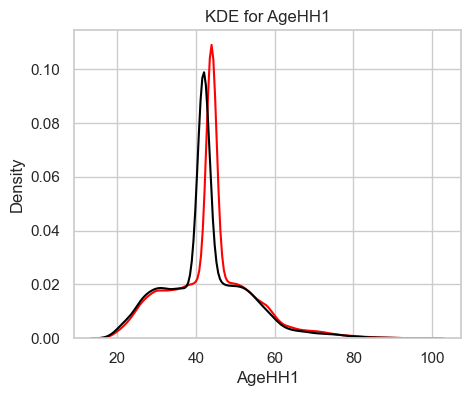

In [48]:
plt.figure(figsize=(5, 4))
plt.title("KDE for {}".format('AgeHH1'))
ax0 = sns.kdeplot(train[train['Churn'] == 'No']['AgeHH1'].dropna(), color= 'red', label= 'Churn: No')
ax1 = sns.kdeplot(train[train['Churn'] == 'Yes']['AgeHH1'].dropna(), color= 'black', label= 'Churn: Yes')

In [49]:
train.isnull().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetWebCapable            0
Homeowne

* <b>Correlation between features</b>

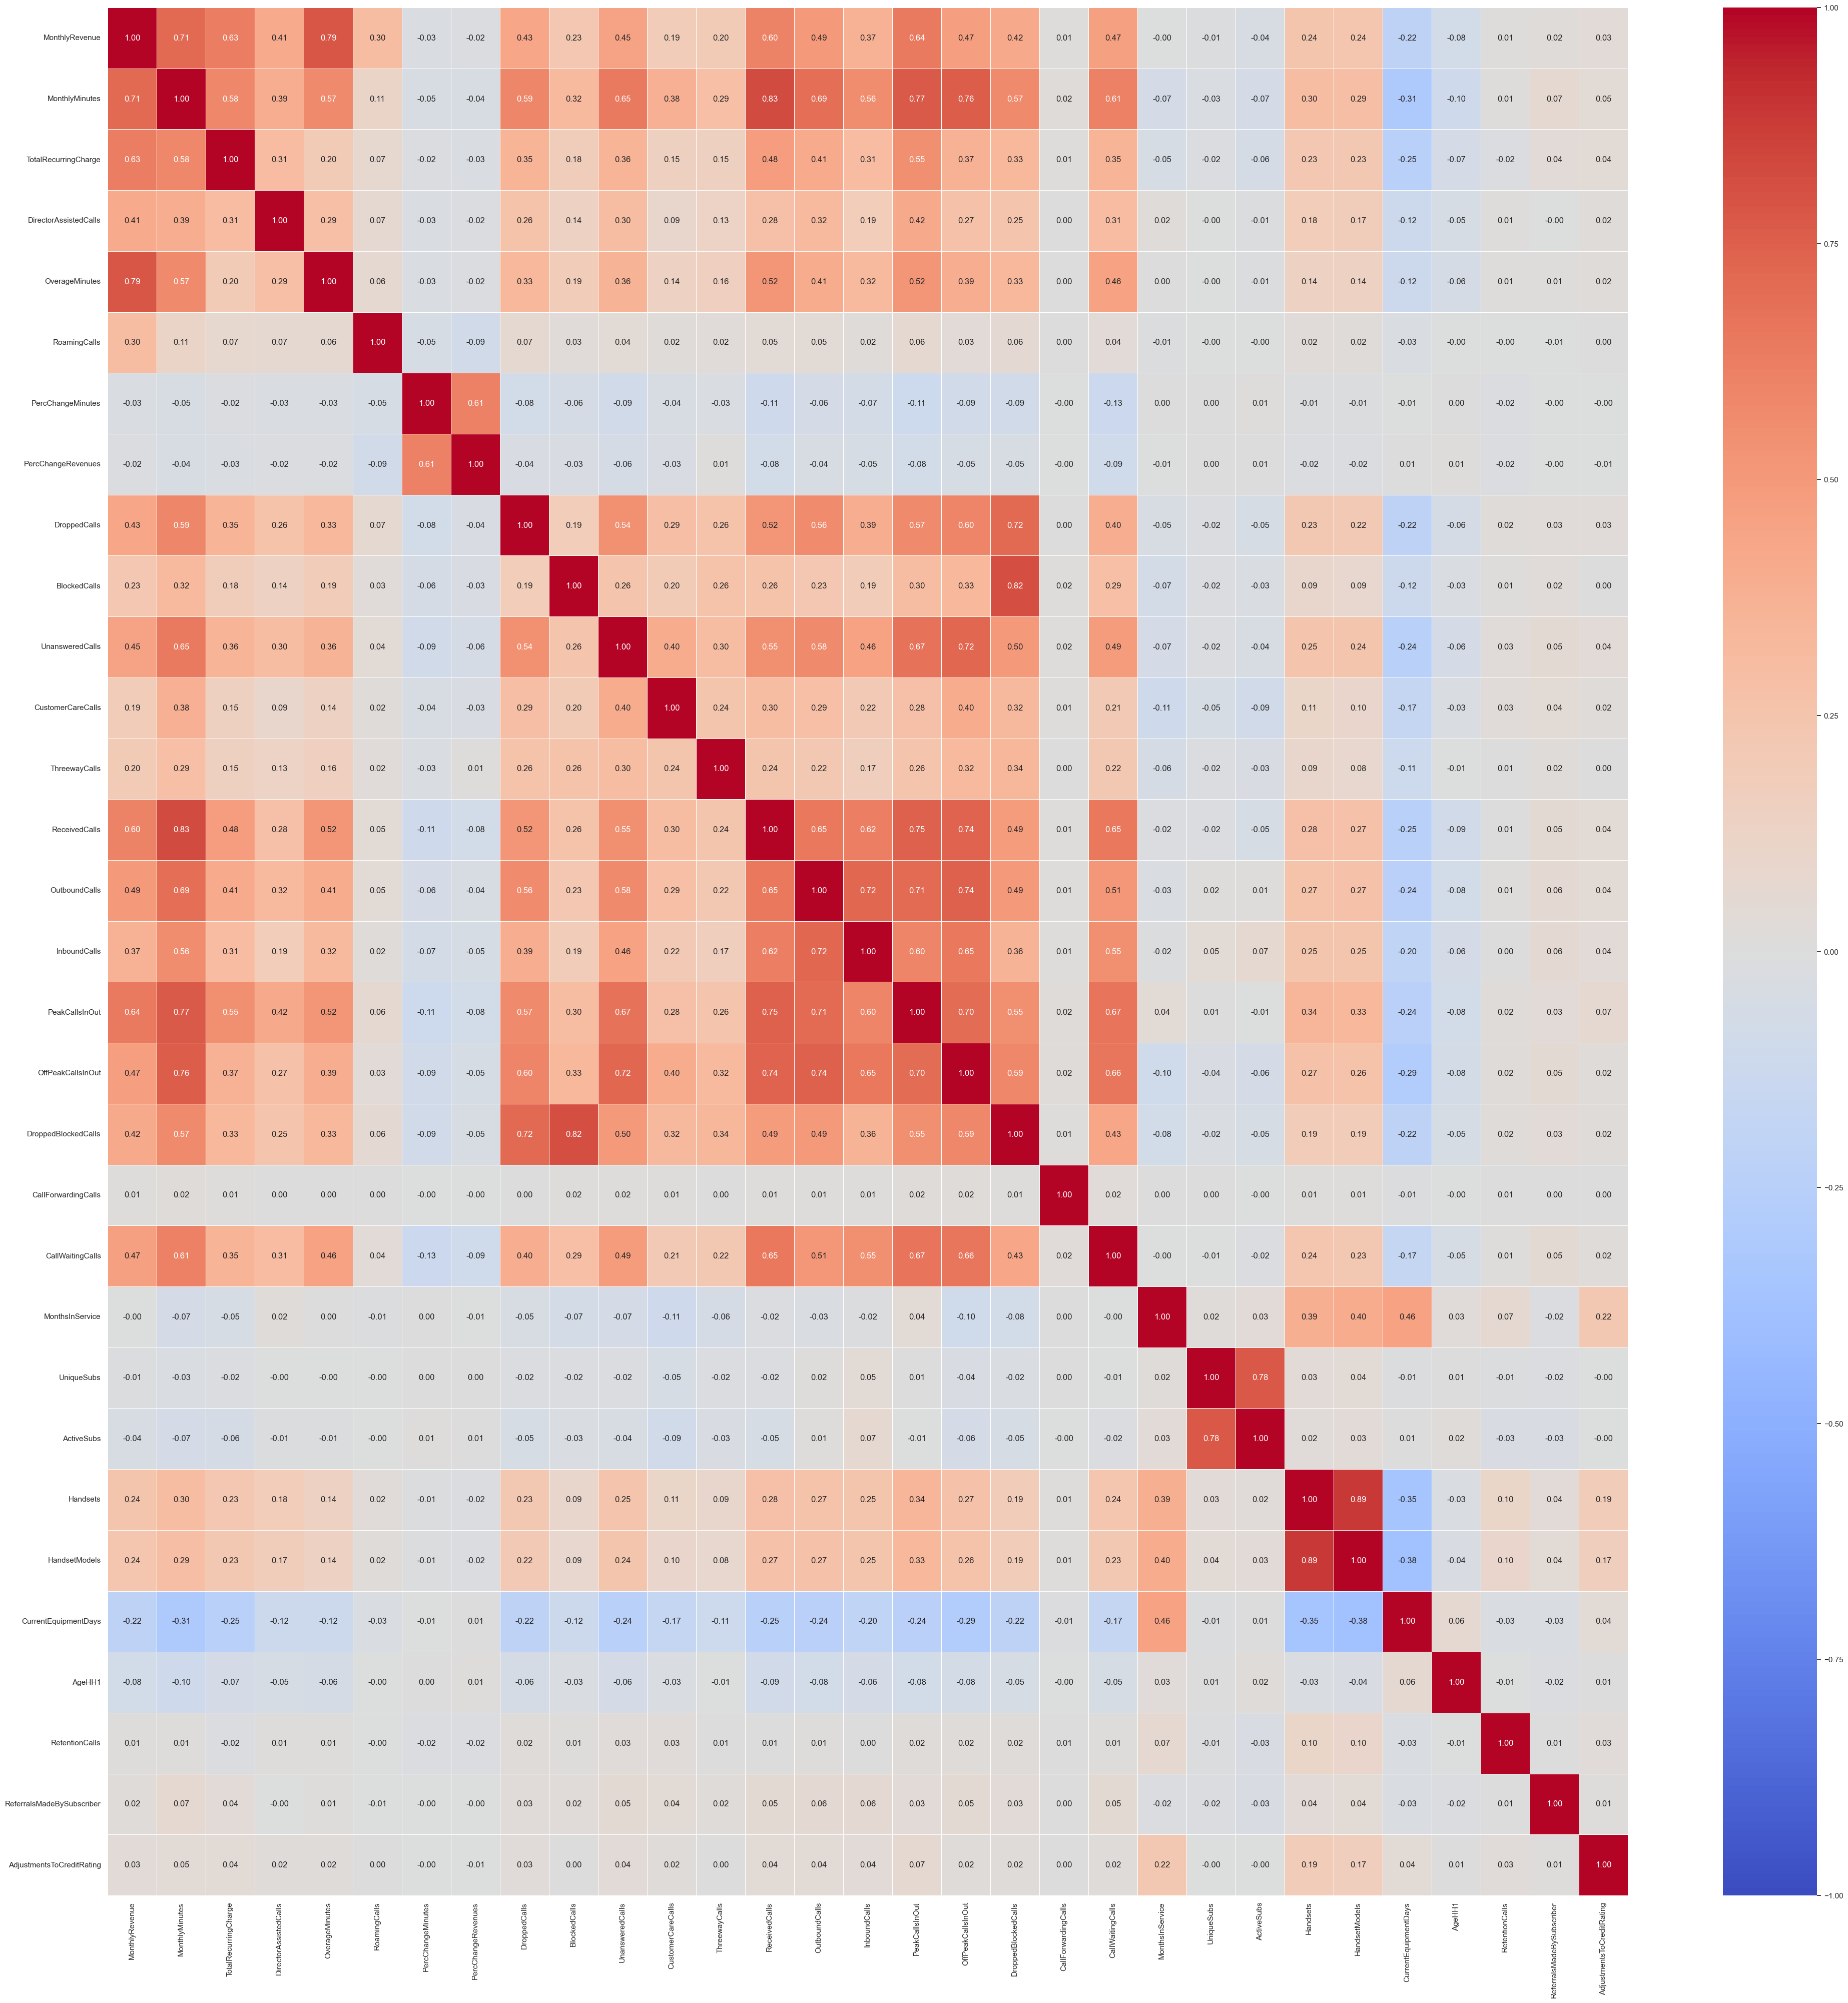

In [50]:
# sns.reset_defaults() 
cor = train.corr()
ones_corr = np.ones_like(cor, dtype = bool)
mask = np.triu(ones_corr)
f, ax = plt.subplots(figsize = (49,49))
sns.heatmap(cor, fmt=".2f", linewidths=0.5, ax=ax, annot = True,
            cmap='coolwarm',
            vmin = -1, vmax = 1)
# plt.clf()
plt.show()

Pairs of variables with strong positive correlation will be colored in red and have a value close to 1, while pairs of variables with strong negative correlation will be colored in blue and have a value close to -1. If there is no correlation between the variables, the color will be white and the value will be 0.

### Outlier Detection

In [51]:
print ("There are " + str(train.shape[1]) + " columns and  " + str(train.shape[0]) + " rows in the train data.\n")

There are 46 columns and  51047 rows in the train data.



In [52]:
from scipy.stats import zscore
from scipy import stats 

train_outliers=train.select_dtypes(include=['int', 'float'])
train_outliers.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,RetentionCalls,ReferralsMadeBySubscriber,AdjustmentsToCreditRating
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,61,2,1,2.0,2.0,361.0,62.0,1,0,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,58,1,1,2.0,1.0,1504.0,40.0,0,0,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,60,1,1,1.0,1.0,1812.0,26.0,0,0,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,59,2,2,9.0,4.0,458.0,30.0,0,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,53,2,2,4.0,3.0,852.0,46.0,0,0,1


<i>Using Z-score method. Check number of outliers using `zscore`</i>

In [53]:
outliers1={}
for col in train_outliers:
    z_score = zscore(train_outliers[col])
    # z = (x-mean)/std
    
    upper_replace_value = train_outliers[z_score<=3][col].max()
    lower_replace_value = train_outliers[z_score>=-3][col].min()
    outliers1[col] = len(train_outliers[col][(train_outliers[col] > upper_replace_value)| (train_outliers[col] < lower_replace_value)])
outliers_zscore = pd.DataFrame(outliers1.items(),columns=['Feature','Outliers'])
print(outliers_zscore)

                      Feature  Outliers
0              MonthlyRevenue       880
1              MonthlyMinutes       914
2        TotalRecurringCharge       541
3       DirectorAssistedCalls       837
4              OverageMinutes       901
5                RoamingCalls       315
6           PercChangeMinutes      1102
7          PercChangeRevenues       841
8                DroppedCalls       987
9                BlockedCalls       819
10            UnansweredCalls       975
11          CustomerCareCalls       853
12              ThreewayCalls       567
13              ReceivedCalls      1067
14              OutboundCalls       966
15               InboundCalls       976
16             PeakCallsInOut       939
17          OffPeakCallsInOut      1034
18        DroppedBlockedCalls       883
19        CallForwardingCalls        49
20           CallWaitingCalls       765
21            MonthsInService       583
22                 UniqueSubs       234
23                 ActiveSubs       611


In [54]:
train_new2 = train_outliers.copy()
outliers_2={}
for col in train_outliers:
    lower_lim = train_outliers[col].quantile(q=0.01)
    upper_lim = train_outliers[col].quantile(q=0.99)
    outliers_2[col] = len(train_new2[col][(train_new2[col] > upper_lim)| (train_new2[col] < lower_lim)])
outliers_hard=pd.DataFrame(outliers_2.items(),columns=['Feature','Outliers'])
outliers_hard

,Feature,Outliers
0,MonthlyRevenue,935
1,MonthlyMinutes,511
2,TotalRecurringCharge,975
3,DirectorAssistedCalls,490
4,OverageMinutes,511
5,RoamingCalls,510
6,PercChangeMinutes,1021
7,PercChangeRevenues,1022
8,DroppedCalls,493
9,BlockedCalls,510


In [55]:
# outliers2={}
# outlier_features = ['Handsets', 'HandsetModels','ReferralsMadeBySubscriber', 'RetentionCalls', 'AdjustmentsToCreditRating']
# for col in train_outliers:
#     z_score = zscore(train_outliers[col])
#     upper_replace_value = train_outliers[z_score<=3][col].max()
#     lower_replace_value = train_outliers[z_score>=-3][col].min()
#     if col not in outlier_features:
#         train.loc[train_outliers[col] > upper_replace_value, col] = upper_replace_value
#         train.loc[train_outliers[col] < lower_replace_value, col] = lower_replace_value
        
#     outliers2[col] = len(train[col][(train[col] > upper_replace_value)| (train[col] < lower_replace_value)])
# outliers_zscore = pd.DataFrame(outliers2.items(),columns=['Feature','Outliers'])
# print(outliers_zscore)

### Label encoding

In [56]:
for i in train.columns:
      if train[i].dtype==object:
            print(pd.DataFrame(train[i].value_counts()))

#### Encode Dependent Variables

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_df=train.copy()
enc = LabelEncoder()
one_enc = OneHotEncoder()

for col in train_df.columns:
    if (col == 'Occupation'):
        one_enc.fit(train_df[col].astype(str).values.reshape(-1,1))  # fit the one-hot encoder
        train_df[col] = one_enc.transform(train_df[col].astype(str).values.reshape(-1,1)).toarray() 
    if (train_df.dtypes[col] == 'category') and (col != "Occupation"):
        enc.fit(train_df[col].astype(str))
        train_df[col] = enc.transform(train_df[col].astype(str))
        
train_df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,1,0,0,0,0,4,0,0,2,0.0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,0,1,0,0,5,0,3,2,0.0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,0,1,0,0,6,0,2,3,0.0
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,0,1,0,0,6,0,3,0,0.0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,0,0,1,0,9,1,0,0,0.0


In [58]:
train_df.describe()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
count,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,...,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,0.288185,58.802097,525.141419,46.823124,0.892493,39.905460,1.232466,-11.500833,-1.185572,6.011489,...,0.037201,0.017259,0.192450,0.137814,0.052070,4.324524,0.053911,1.886967,1.135189,0.019316
std,0.452922,44.443141,529.143456,23.812749,2.225687,96.465678,9.803517,256.587986,39.432467,9.043955,...,0.206483,0.130235,0.394228,0.344708,0.307592,3.138236,0.383147,1.583360,1.174839,0.137633
min,0.000000,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,33.660000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-6.900000,0.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,48.480000,366.000000,45.000000,0.250000,2.000000,0.000000,-5.000000,-0.300000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,70.960000,722.000000,60.000000,0.990000,40.000000,0.200000,65.000000,1.550000,7.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,3.000000,2.000000,0.000000
max,1.000000,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,4.000000,1.000000,1.000000,1.000000,35.000000,9.000000,25.000000,6.000000,3.000000,1.000000


### Feature scaling & Train-Test split

In [59]:
y = train_df['Churn']
X = train_df.drop(columns=['Churn'],axis=1)

X.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,1,0,0,0,0,4,0,0,2,0.0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,0,1,0,0,5,0,3,2,0.0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,0,0,1,0,0,6,0,2,3,0.0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,0,1,0,0,6,0,3,0,0.0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,0,0,1,0,9,1,0,0,0.0


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[X.columns] = scaler.fit_transform(X[X.columns])

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023,stratify=y)

#### UnderSampling

In [62]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

#Undersampling:Tries to balance data 
undersample = RandomUnderSampler(sampling_strategy='majority')
X_blnc, y_blnc = undersample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(y_blnc))


Counter({0: 29068, 1: 11769})
Counter({0: 11769, 1: 11769})


### Training model with different algorithms

We tried to predict and analyzed Customer Loss with classification algorithms. DecisionTree, Random Forest, AdaBoostClassifier, KNN, XGBOOST algorithms were used
 

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score

##### Training models with balanced data

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score

In [65]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict

kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2023)

# for (train_idx, val_idx) in kf.split(X,y):

#     X_train_1 = X.iloc[train_idx, :]
#     y_train_1 = y.iloc[train_idx]
#     X_test_1 = X.iloc[val_idx, :]
#     y_test_1 = y.iloc[val_idx]
#     print(y_train_1.value_counts())

* <b><i>Decision tree</i></b>

In [66]:
max_depth = [3,5,7,10]
criterion = ['gini', 'entropy']
min_samples_split = [2, 5, 7, 9, 10] # số lượng mẫu dữ liệu tối thiểu cần có tại mỗi nút để tiếp tục phân tách
min_samples_leaf = [1, 3, 5, 10] # số lượng mẫu dữ liệu tối thiểu cần có tại mỗi lá của cây

dtc = DecisionTreeClassifier(class_weight='balanced', random_state = 2023)
grid = dict(criterion= criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split = min_samples_split)
grid_search = GridSearchCV(estimator=dtc, param_grid=grid, n_jobs=-1, cv=kf, scoring='f1',error_score=0)
grid_result_dtc = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result_dtc.best_score_, grid_result_dtc.best_params_))

Best: 0.574950 using {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [67]:
dtc = DecisionTreeClassifier(**grid_result_dtc.best_params_,
                             random_state = 2023)

In [68]:
# using balanced data
dtc.fit(X_blnc, y_blnc)

y_pred = dtc.predict(X_test)
precision_score(y_test, y_pred)

0.4838553046856033

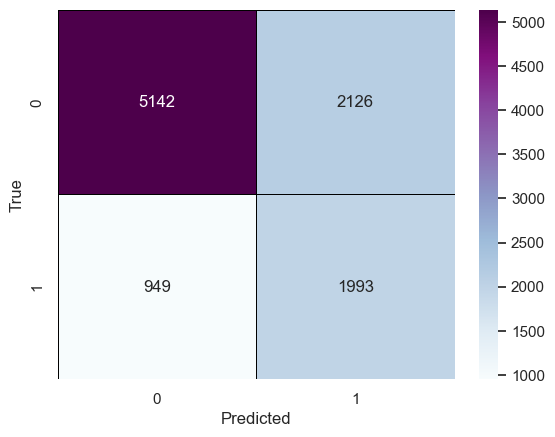

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      7268
           1       0.48      0.68      0.56      2942

    accuracy                           0.70     10210
   macro avg       0.66      0.69      0.67     10210
weighted avg       0.74      0.70      0.71     10210

Accuracy on the training set: 0.72
AUC: 0.792


In [69]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test,y_pred))

print("Accuracy on the training set: {:.2f}".format(dtc.score(X_blnc, y_blnc)))

y_proba = dtc.predict_proba(X_test)[:, 1]
# Tính AUC bằng hàm roc_auc_score()
auc = roc_auc_score(y_test, y_proba)

print("AUC: {:.3f}".format(auc))

* <b><i>Random forest</i></b>

In [70]:
n_estimators = [100, 150]                              # number of trees in the random forest
max_depth = [5, 7, 9]                                    # maximum number of levels allowed in each decision tree
min_samples_split = [2, 5, 10]                               # minimum sample number to split a node
min_samples_leaf = [1, 2, 4]                                 # minimum sample number that can be stored in a leaf node
criterion = ['entropy']

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf = RandomForestClassifier(class_weight='balanced', random_state = 2023)

grid_search = GridSearchCV(estimator=rf, param_grid=random_grid, n_jobs=-1, cv=kf, scoring='f1',error_score=0)
grid_result_rf = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))
# rf_random = RandomizedSearchCV(estimator = rf,
#                                param_distributions = random_grid,
#                                n_iter = 100, 
#                                cv = kf, 
#                                n_jobs = -1)
# rf_random.fit(X_train, y_train)
# print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best: 0.593242 using {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [71]:
# Create and fit the Random Forest Classifier
rf = RandomForestClassifier(**grid_result_rf.best_params_,
                            random_state = 2023)

In [72]:
# using balanced data
rf.fit(X_blnc, y_blnc)
y_pred = rf.predict(X_test)
# Make predictions on the training set
print(rf.score(X_blnc, y_blnc))

0.7784858526637777


<b>Feature importance</b>

                           importance
AgeHH1                       0.312708
IncomeGroup                  0.114800
Homeownership                0.063626
HasCreditCard                0.062307
CurrentEquipmentDays         0.059261
MonthsInService              0.049893
MonthlyMinutes               0.026543
PercChangeMinutes            0.026129
RespondsToMailOffers         0.020872
TotalRecurringCharge         0.017865
PercChangeRevenues           0.016857
MonthlyRevenue               0.016729
OffPeakCallsInOut            0.013640
PeakCallsInOut               0.013082
OverageMinutes               0.012856
ReceivedCalls                0.011946
OutboundCalls                0.011234
UnansweredCalls              0.010982
DroppedBlockedCalls          0.010253
ChildrenInHH                 0.009646
CreditRating                 0.008989
InboundCalls                 0.008980
DroppedCalls                 0.008903
BlockedCalls                 0.008460
CustomerCareCalls            0.008094
Handsets    

<Axes: ylabel='Columns'>

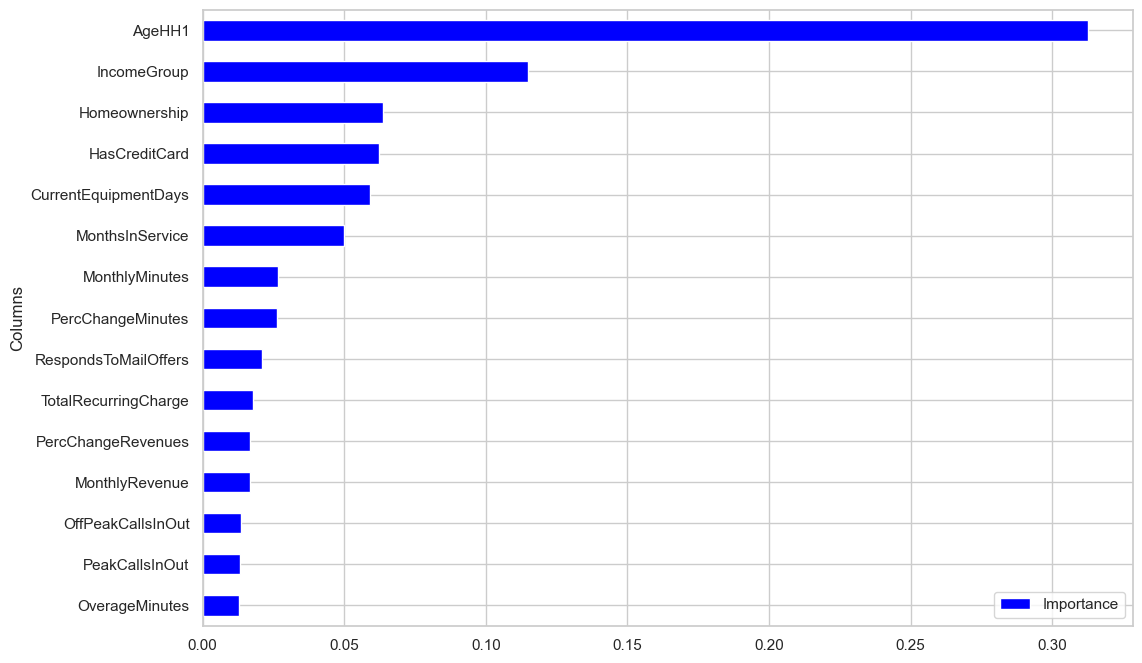

In [73]:
importance = rf.feature_importances_
importances=pd.DataFrame({"Columns":X_blnc.columns,"Importance":importance})
importances=importances.set_index("Columns")
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)
importances.sort_values(by="Importance",axis=0,ascending=True)[30:].plot(kind="barh",color="blue",figsize=(12,8))

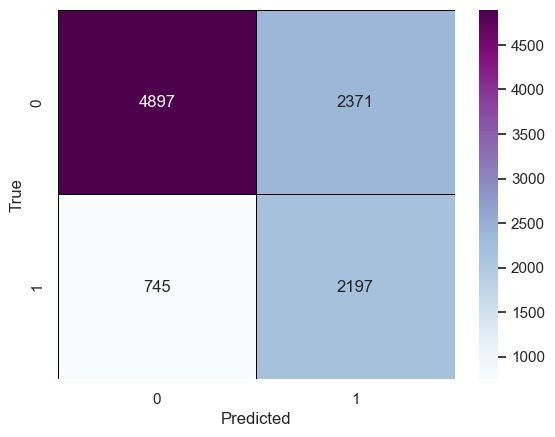

              precision    recall  f1-score   support

           0       0.87      0.67      0.76      7268
           1       0.48      0.75      0.59      2942

    accuracy                           0.69     10210
   macro avg       0.67      0.71      0.67     10210
weighted avg       0.76      0.69      0.71     10210

Accuracy on the training set: 0.78
AUC: 0.810


In [74]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

print("Accuracy on the training set: {:.2f}".format(rf.score(X_blnc, y_blnc)))

y_proba = rf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_proba)
print("AUC: {:.3f}".format(auc))

* <b><i>AdaBoost</i></b>


In [75]:
learning_rates = [0.01, 0.1, 1.0]
n_estimators = [100, 200, 500]

# best_recall = 0
best_lr = None
best_n_est = None
best_f1 = 0

for lr in learning_rates:
    for n_est in n_estimators:
        f1 = []
        accuracy = []
        print('learning_rates: ',lr,' n_estimators: ',n_est)
        acc_scores = []
#         recall = []
        for (train_idx, val_idx) in kf.split(X,y):
            # Split data into training and validation sets
            X_train_1 = X.iloc[train_idx, :]
            y_train_1 = y.iloc[train_idx]
            X_test_1 = X.iloc[val_idx, :]
            y_test_1 = y.iloc[val_idx]
            
            undersample = RandomUnderSampler(sampling_strategy='majority')
            X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
            
            ada = AdaBoostClassifier(n_estimators=n_est, learning_rate=lr, random_state=2023)
            ada.fit(X_1, y_1)
            
            print("Accuracy on the training set: {:.2f}".format(ada.score(X_1, y_1)))

            y_pred = ada.predict(X_test_1)
            f1.append(f1_score(y_test_1,y_pred))
            accuracy.append(accuracy_score(y_test_1,y_pred))
#             print(classification_report(y_test, y_pred))

        avg_f1 = np.mean(f1)
        avg_acc = np.mean(accuracy)
        print("Average f1 = ", avg_f1)
        print("Average accuracy = ", avg_acc)
        
        if avg_f1 > best_f1:
            best_f1 = avg_f1
            best_lr = lr
            best_n_est = n_est

print("Best hyperparameters: learning_rate = {}, n_estimators = {}".format(best_lr, best_n_est))
print("Best f1-score: {}".format(best_f1))

learning_rates:  0.01  n_estimators:  100
Accuracy on the training set: 0.65
Accuracy on the training set: 0.65
Accuracy on the training set: 0.65
Accuracy on the training set: 0.65
Accuracy on the training set: 0.65
Average f1 =  0.5214320899905085
Average accuracy =  0.6497933771827954
learning_rates:  0.01  n_estimators:  200
Accuracy on the training set: 0.66
Accuracy on the training set: 0.65
Accuracy on the training set: 0.65
Accuracy on the training set: 0.65
Accuracy on the training set: 0.65
Average f1 =  0.5214320899905085
Average accuracy =  0.6497933771827954
learning_rates:  0.01  n_estimators:  500
Accuracy on the training set: 0.66
Accuracy on the training set: 0.67
Accuracy on the training set: 0.67
Accuracy on the training set: 0.66
Accuracy on the training set: 0.67
Average f1 =  0.5312168308162304
Average accuracy =  0.6716948220967287
learning_rates:  0.1  n_estimators:  100
Accuracy on the training set: 0.67
Accuracy on the training set: 0.67
Accuracy on the traini

In [76]:
ada = AdaBoostClassifier(learning_rate = best_lr, n_estimators = best_n_est, random_state = 2023)

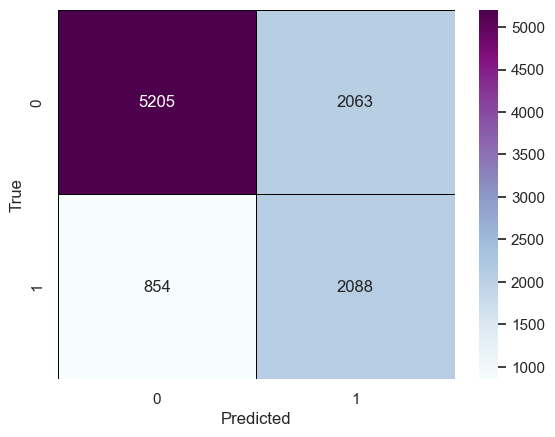

              precision    recall  f1-score   support

           0       0.86      0.72      0.78      7268
           1       0.50      0.71      0.59      2942

    accuracy                           0.71     10210
   macro avg       0.68      0.71      0.68     10210
weighted avg       0.76      0.71      0.73     10210

Accuracy on the training set: 0.73
AUC: 0.800


In [77]:
# using balanced data
ada.fit(X_blnc, y_blnc)
y_pred = ada.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_test, y_pred))

train_accuracy = ada.score(X_blnc, y_blnc)

print("Accuracy on the training set: {:.2f}".format(train_accuracy))
y_proba = ada.predict_proba(X_test)[:, 1]

# Tính AUC bằng hàm roc_auc_score()
auc = roc_auc_score(y_test, y_proba)

print("AUC: {:.3f}".format(auc))

* <b><i>K Neighbors</i></b>
Using loop to find the best setting

In [78]:
neighbors = range(5,60,3)
p = [1,2]

# best_recall = 0
best_neighbors = None
best_p = None
best_f1 = 0

for n in neighbors:
    for p_idx in p:
        f1 = []
        accuracy = []
        print('n_neighbor: ',n,' p: ',p_idx)
#         acc_scores = []
#         recall = []
        for (train_idx, val_idx) in kf.split(X,y):
            # Split data into training and validation sets
            X_train_1 = X.iloc[train_idx, :]
            y_train_1 = y.iloc[train_idx]
            X_test_1 = X.iloc[val_idx, :]
            y_test_1 = y.iloc[val_idx]
            
            undersample = RandomUnderSampler(sampling_strategy='majority')
            X_1, y_1 = undersample.fit_resample(X_train_1, y_train_1)
            
            knn = KNeighborsClassifier(n_neighbors = n, p=p_idx)
            knn.fit(X_1, y_1)
            
            y_pred = knn.predict(X_test_1)
            f1.append(recall_score(y_test_1,y_pred))
            accuracy.append(accuracy_score(y_test_1,y_pred))
#             print(classification_report(y_test_1, y_pred))

        avg_f1 = np.mean(f1)
        avg_acc = np.mean(accuracy)
        print("Average f1 = ", avg_f1)
        print("Average accuracy = ", avg_acc)
        
        if avg_f1 > best_f1:
            best_f1 = avg_f1
            best_neighbors = n
            best_p = p_idx

print("Best hyperparameters: n_neighbors = {}, p = {}".format(best_neighbors, best_p))
print("Best f1: {}".format(best_f1))

n_neighbor:  5  p:  1
Average f1 =  0.5468700690412189
Average accuracy =  0.5782122762567913
n_neighbor:  5  p:  2
Average f1 =  0.5251171534016007
Average accuracy =  0.5445176592756924
n_neighbor:  8  p:  1
Average f1 =  0.4317179827093199
Average accuracy =  0.6328284783384751
n_neighbor:  8  p:  2
Average f1 =  0.4018761868661144
Average accuracy =  0.5980369225402601
n_neighbor:  11  p:  1
Average f1 =  0.5512201347469124
Average accuracy =  0.5912002171270784
n_neighbor:  11  p:  2
Average f1 =  0.5283801704398066
Average accuracy =  0.5543322982573134
n_neighbor:  14  p:  1
Average f1 =  0.47100899413811437
Average accuracy =  0.6290868929481572
n_neighbor:  14  p:  2
Average f1 =  0.4391273766485038
Average accuracy =  0.5962544888231649
n_neighbor:  17  p:  1
Average f1 =  0.5550270919045828
Average accuracy =  0.6037964773261365
n_neighbor:  17  p:  2
Average f1 =  0.5329351954065842
Average accuracy =  0.5618351996649074
n_neighbor:  20  p:  1
Average f1 =  0.48236105307435

In [79]:
knn = KNeighborsClassifier(n_neighbors = best_neighbors, p = best_p)

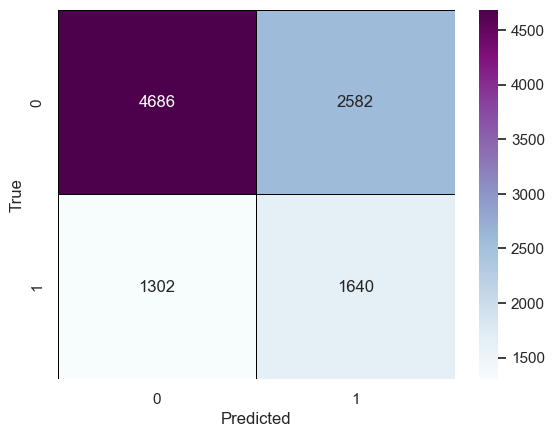

              precision    recall  f1-score   support

           0       0.78      0.64      0.71      7268
           1       0.39      0.56      0.46      2942

    accuracy                           0.62     10210
   macro avg       0.59      0.60      0.58     10210
weighted avg       0.67      0.62      0.64     10210

Accuracy on the training set: 0.65
AUC: 0.644


In [80]:
# using balance data to train
knn.fit(X_blnc, y_blnc)
y_pred = knn.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))

train_accuracy = knn.score(X_blnc, y_blnc)
print("Accuracy on the training set: {:.2f}".format(train_accuracy))
    
y_proba = knn.predict_proba(X_test)[:, 1]
# Tính AUC bằng hàm roc_auc_score()
auc = roc_auc_score(y_test, y_proba)

print("AUC: {:.3f}".format(auc))

* <b><i>XGBOOST</i></b>

In [81]:
xgb = XGBClassifier(random_state = 2023)
param_grid = {
    'n_estimators': [100, 50],
    'max_depth': [3,5,6],
    'gamma': [0, 0.1, 0.5],
    'eval_metric' : ['logloss', 'auc']
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, scoring='f1',error_score=0)
grid_result_xgb = grid_search.fit(X_blnc, y_blnc)

print("Best parameters: ", grid_result_xgb.best_params_)
print("Best f1: ", grid_result_xgb.best_score_)

Best parameters:  {'eval_metric': 'logloss', 'gamma': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best f1:  0.7299604118500798


In [82]:
xgb = XGBClassifier(**grid_result_xgb.best_params_)

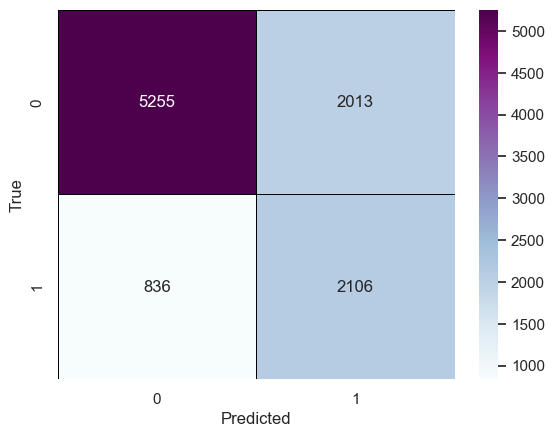

              precision    recall  f1-score   support

           0       0.86      0.72      0.79      7268
           1       0.51      0.72      0.60      2942

    accuracy                           0.72     10210
   macro avg       0.69      0.72      0.69     10210
weighted avg       0.76      0.72      0.73     10210

Accuracy on the training set: 0.77
AUC: 0.820


In [83]:
# using balanced data
xgb.fit(X_blnc, y_blnc)
y_pred = xgb.predict(X_test)

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))

train_accuracy = xgb.score(X_blnc, y_blnc)
print("Accuracy on the training set: {:.2f}".format(train_accuracy))

y_proba = xgb.predict_proba(X_test)[:, 1]

# Tính AUC bằng hàm roc_auc_score()
auc = roc_auc_score(y_test, y_proba)

print("AUC: {:.3f}".format(auc))

In [84]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 

from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

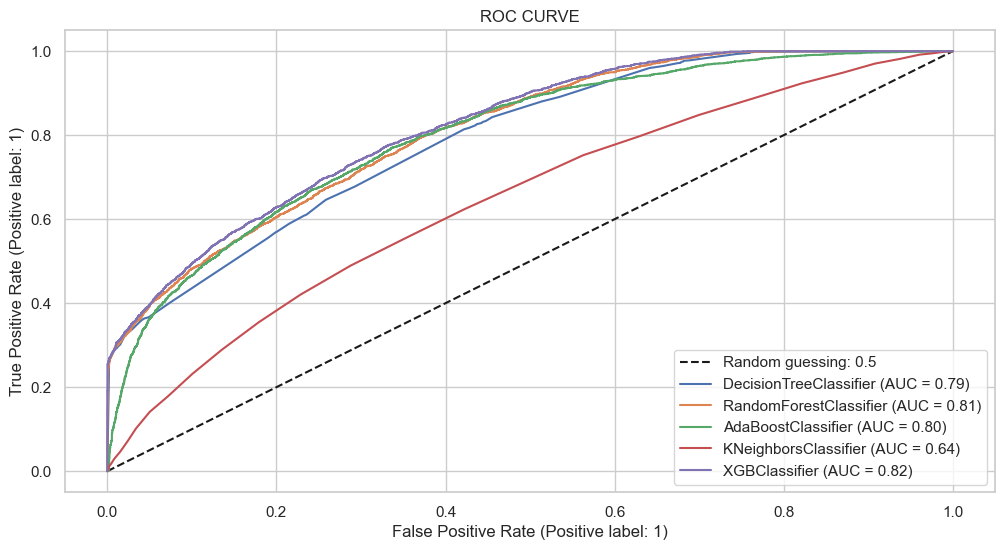

In [85]:
from sklearn.metrics import RocCurveDisplay

models = [dtc, rf, ada, knn, xgb]

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.title("ROC CURVE")
plt.legend(loc="lower right")
ax = plt.gca()
for i in models:
    RocCurveDisplay.from_estimator(i, X_test, y_test,ax=ax)

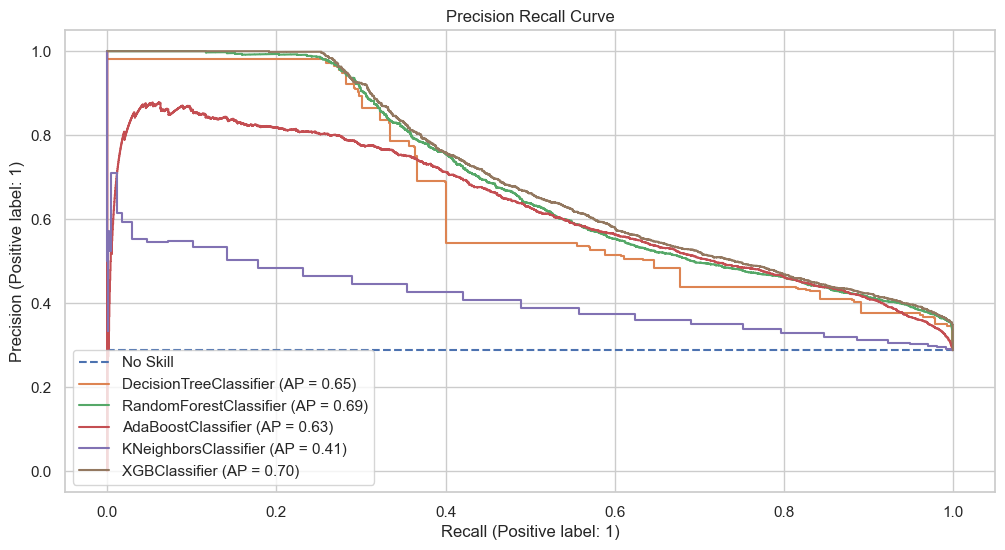

In [86]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

models = [dtc, rf, ada, knn, xgb]

plt.figure(figsize = (12,6), linewidth= 1)
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.title("Precision Recall Curve")
plt.legend(loc="upper left")
ax = plt.gca()

for i in models:
    PrecisionRecallDisplay.from_estimator(i, X_test, y_test,ax=ax)

##### Training models with imbalanced data

Decision Tree


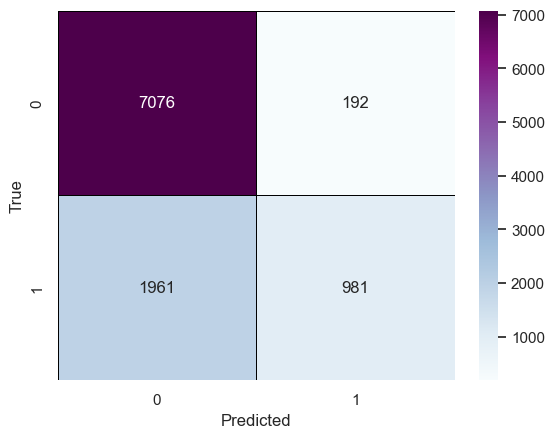

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      7268
           1       0.84      0.33      0.48      2942

    accuracy                           0.79     10210
   macro avg       0.81      0.65      0.67     10210
weighted avg       0.80      0.79      0.76     10210

Accuracy on the training set: 0.80
RF


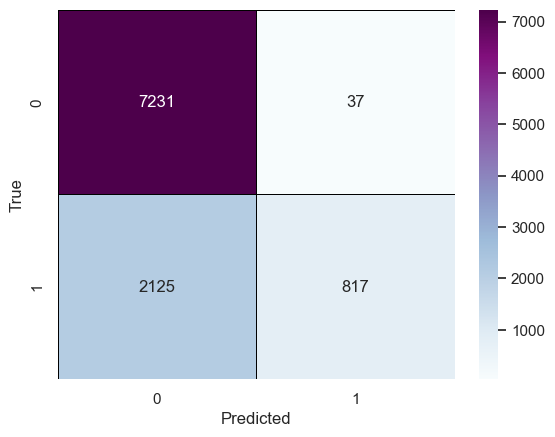

              precision    recall  f1-score   support

           0       0.77      0.99      0.87      7268
           1       0.96      0.28      0.43      2942

    accuracy                           0.79     10210
   macro avg       0.86      0.64      0.65     10210
weighted avg       0.83      0.79      0.74     10210

Accuracy on the training set: 0.80
KNN


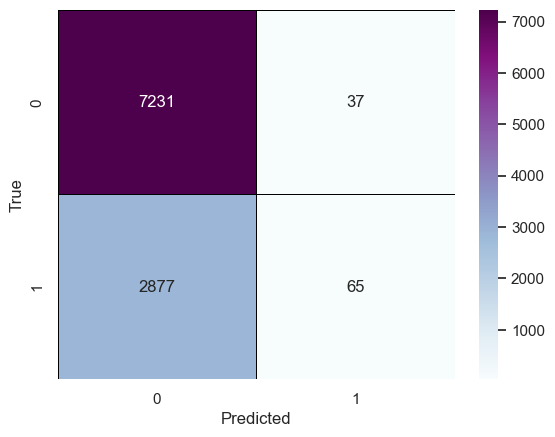

              precision    recall  f1-score   support

           0       0.72      0.99      0.83      7268
           1       0.64      0.02      0.04      2942

    accuracy                           0.71     10210
   macro avg       0.68      0.51      0.44     10210
weighted avg       0.69      0.71      0.60     10210

Accuracy on the training set: 0.72
XGB


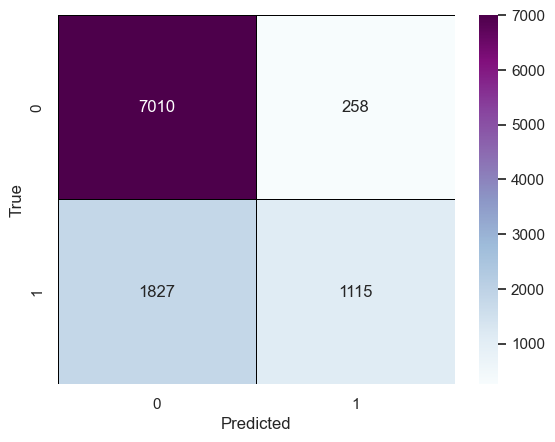

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      7268
           1       0.81      0.38      0.52      2942

    accuracy                           0.80     10210
   macro avg       0.80      0.67      0.69     10210
weighted avg       0.80      0.80      0.77     10210

Accuracy on the training set: 0.81
AdaBoost


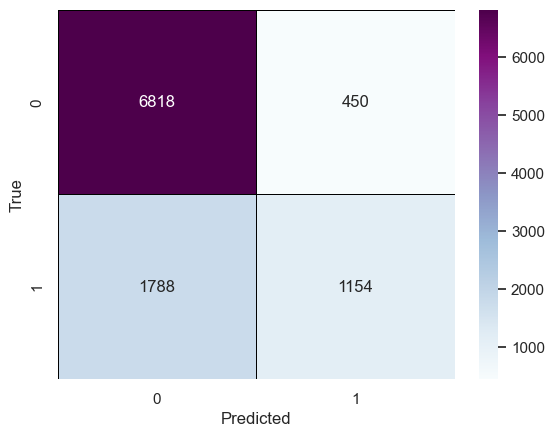

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      7268
           1       0.72      0.39      0.51      2942

    accuracy                           0.78     10210
   macro avg       0.76      0.67      0.68     10210
weighted avg       0.77      0.78      0.76     10210

Accuracy on the training set: 0.79


In [87]:
def run_exps(X_train , y_train, X_test, y_test):

    models = [
          ('Decision Tree', DecisionTreeClassifier(**grid_result_dtc.best_params_,
                                                     random_state = 2023)),
          ('RF', RandomForestClassifier(**grid_result_rf.best_params_,
                                        random_state = 2023)),
          ('KNN', KNeighborsClassifier(n_neighbors = best_neighbors, p = best_p)),
          ('XGB', XGBClassifier(**grid_result_xgb.best_params_, random_state = 2023)),
          ('AdaBoost',AdaBoostClassifier(learning_rate = best_lr, n_estimators = best_n_est, random_state = 2023)),
        ]

    for name, model in models:

        clf = model.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        conf = confusion_matrix(y_test, y_pred)
        print(name)
        sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show() 
    
        print(classification_report(y_test, y_pred))
        print("Accuracy on the training set: {:.2f}".format(model.score(X_train , y_train)))
    
run_exps(X_train , y_train, X_test, y_test)

### Baseline Model Comparison
<i>Note: these models use imbalanced data</i>

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier 
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

models = [
    KNeighborsClassifier(n_neighbors = best_neighbors, p = best_p),
    DecisionTreeClassifier(**grid_result_dtc.best_params_,
                             random_state = 2023),
    RandomForestClassifier(**grid_result_rf.best_params_,
                             random_state = 2023),
    AdaBoostClassifier(learning_rate = best_lr, n_estimators = best_n_est, random_state = 2023),
    XGBClassifier(**grid_result_xgb.best_params_, random_state = 2023),
]

In [89]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv = 5, plot_result = False):
    
    #define K-fold
    kfold = StratifiedKFold(cv, shuffle = True, random_state = 2023)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
#         print(model_name)
        scores = cross_val_score(model, X, y, scoring = metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx, score))
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_id', "accuracy_score"])
    return cv_df

generate_baseline_results(models, X, y, metrics = "accuracy", cv = 5, plot_result = False)

,model_name,fold_id,accuracy_score
0,KNeighborsClassifier,0,0.715573
1,KNeighborsClassifier,1,0.714202
2,KNeighborsClassifier,2,0.715741
3,KNeighborsClassifier,3,0.716525
4,KNeighborsClassifier,4,0.714468
5,DecisionTreeClassifier,0,0.793340
6,DecisionTreeClassifier,1,0.787757
7,DecisionTreeClassifier,2,0.791654
8,DecisionTreeClassifier,3,0.790969
9,DecisionTreeClassifier,4,0.793516


In [90]:
def generate_baseline_results(models, X, y, metrics, cv = 5, plot_result = False):
    
    kfold = StratifiedKFold(cv, shuffle = True, random_state = 2023)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring = metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx, score))
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_id', "recall_score"])
    return cv_df

generate_baseline_results(models, X, y, metrics = "recall", cv = 5, plot_result = False)

,model_name,fold_id,recall_score
0,KNeighborsClassifier,0,0.026164
1,KNeighborsClassifier,1,0.022434
2,KNeighborsClassifier,2,0.023793
3,KNeighborsClassifier,3,0.026173
4,KNeighborsClassifier,4,0.023114
5,DecisionTreeClassifier,0,0.321441
6,DecisionTreeClassifier,1,0.308294
7,DecisionTreeClassifier,2,0.322910
8,DecisionTreeClassifier,3,0.323249
9,DecisionTreeClassifier,4,0.342624


In [91]:
def generate_baseline_results(models, X, y, metrics, cv = 5, plot_result = False):
    
    kfold = StratifiedKFold(cv, shuffle = True, random_state = 2023)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring = metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx, score))
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_id', "precision"])
    return cv_df

generate_baseline_results(models, X, y, metrics = "precision", cv = 5, plot_result = False)

,model_name,fold_id,precision
0,KNeighborsClassifier,0,0.669565
1,KNeighborsClassifier,1,0.611111
2,KNeighborsClassifier,2,0.700000
3,KNeighborsClassifier,3,0.726415
4,KNeighborsClassifier,4,0.623853
5,DecisionTreeClassifier,0,0.893296
6,DecisionTreeClassifier,1,0.872955
7,DecisionTreeClassifier,2,0.875576
8,DecisionTreeClassifier,3,0.869287
9,DecisionTreeClassifier,4,0.852792


In [92]:
def generate_baseline_results(models, X, y, metrics, cv = 5, plot_result = False):
    
    kfold = StratifiedKFold(cv, shuffle = True, random_state = 2023)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring = metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx, score))
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_id', "f1_score"])
    return cv_df

generate_baseline_results(models, X, y, metrics = "f1", cv = 5, plot_result = False)

,model_name,fold_id,f1_score
0,KNeighborsClassifier,0,0.050360
1,KNeighborsClassifier,1,0.043279
2,KNeighborsClassifier,2,0.046022
3,KNeighborsClassifier,3,0.050525
4,KNeighborsClassifier,4,0.044576
5,DecisionTreeClassifier,0,0.472764
6,DecisionTreeClassifier,1,0.455664
7,DecisionTreeClassifier,2,0.471815
8,DecisionTreeClassifier,3,0.471259
9,DecisionTreeClassifier,4,0.488846


### Conclusion

<p>The benefits of accurately predicting churn and taking proactive measures to retain customers can be significant, including improved customer retention, increased revenue, and reduced costs associated with acquiring new customers.</p>

From the accuracy table according to the models and the graph of the positive class's accuracy, we assess that achieving high accuracy in predicting customer churn can be a costly process for businesses.

If the purpose of the company is to identify all customers who are likely to churn, then the focus should be on recall. However, if the goal is to identify customers who are truly likely to churn in order to implement effective retention strategies, then the focus should be on precision. And to balance both of them, we can focus on f1_score = 2recall*precision/(recall+precision)